<a href="https://colab.research.google.com/github/Zoeyyy14/C134/blob/main/C131.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded=files.upload()

Saving c131.csv to c131.csv


In [25]:
import csv
rows=[]
with open("c131.csv","r") as f:
  csvreader=csv.reader(f)
  for row in csvreader:
    rows.append(row)
headers=rows[0]
planet_data_rows=rows[1:]
print(headers)
print(planet_data_rows[0])

['', 'name', 'light_years_from_earth', 'planet_mass', 'stellar_magnitude', 'discovery_date', 'planet_type', 'planet_radius', 'orbital_radius', 'orbital_period', 'eccentricity', 'solar_system_name', 'planet_discovery_method', 'planet_orbital_inclination', 'planet_density', 'right_ascension', 'declination', 'host_temperature', 'host_mass', 'host_radius']
['0', '11 Comae Berenices b', '305.0', '19.4 Jupiters', '4.74', '2007', 'Gas Giant', '1.08 x Jupiter', '1.29 AU', '326 days', '0.23', '11 Com', 'Radial Velocity', '', '', '12h20m43.03s', '+17d47m34.3s', '4742.0', '2.7', '19.0']


In [26]:
headers[0]="row_none"
solar_system_planet_count={}
for planet_data in planet_data_rows:
  if solar_system_planet_count.get(planet_data[11]):
    solar_system_planet_count[planet_data[11]]+=1
  else:
    solar_system_planet_count[planet_data[11]]=1
max_solar_system=max(solar_system_planet_count,key=solar_system_planet_count.get)
print("Solar System {} has Maximine Planet {} Out of All the Solar Systen We have Descover so Far".format(max_solar_system,solar_system_planet_count[max_solar_system]))

Solar System KOI-351 has Maximine Planet 8 Out of All the Solar Systen We have Descover so Far


In [27]:
temp_planet_data_rows = list(planet_data_rows)
for planet_data in temp_planet_data_rows:
  planet_mass = planet_data[3]
  if planet_mass.lower() == "unknown":
    planet_data_rows.remove(planet_data)
    continue
  else:
    planet_mass_value = planet_mass.split(" ")[0]
    planet_mass_ref = planet_mass.split(" ")[1]
    if planet_mass_ref == "Jupiters":
      planet_mass_value = float(planet_mass_value) * 317.8
    planet_data[3] = planet_mass_value

  planet_radius = planet_data[7]
  if planet_radius.lower() == "unknown":
    planet_data_rows.remove(planet_data)
    continue
  else:
    planet_radius_value = planet_radius.split(" ")[0]
    planet_radius_ref = planet_radius.split(" ")[2]
    if planet_radius_ref == "Jupiter":
      planet_radius_value = float(planet_radius_value) * 11.2
    planet_data[7] = planet_radius_value

print(len(planet_data_rows))

hd_10180_planets = []
for planet_data in planet_data_rows:
  if max_solar_system == planet_data[11]:
    hd_10180_planets.append(planet_data)

print(len(hd_10180_planets))
print(hd_10180_planets)

4251
7
[['3665', 'Kepler-903 b', '2704.0', '4.7', '14.615', '2016', 'Super Earth', '2.01', 'Unknown', '10.4 days', '0.0', 'KOI-351', 'Transit', '89.2', '', '18h57m44.04s', '+49d18m18.6s', '6080.0', '1.2', '1.2'], ['3824', 'KOI-142 b', '1106.0', '9.5', '13.11', '2013', 'Neptune-like', 3.4383999999999997, 'Unknown', '10.9 days', '0.06', 'KOI-351', 'Transit', '89.4', '', '18h57m44.04s', '+49d18m18.6s', '6080.0', '1.2', '1.2'], ['3825', 'KOI-142 c', '1106.0', 214.1972, '13.11', '2013', 'Gas Giant', 14.0, '0.15525 AU', '22.3 days', '0.06', 'KOI-351', 'Transit', '89.68', '', '18h57m44.04s', '+49d18m18.6s', '6080.0', '1.2', '1.2'], ['3826', 'KOI-1599.01', '3813.0', '4.6', '14.854000000000001', '2019', 'Super Earth', '1.9', '0.14728 AU', '20.4 days', '0.01', 'KOI-351', 'Transit', '89.71', '', '18h57m44.04s', '+49d18m18.6s', '6080.0', '1.2', '1.2'], ['3827', 'KOI-1599.02', '3813.0', '9', '14.854000000000001', '2019', 'Super Earth', '1.9', '0.112293 AU', '13.6 days', '0.01', 'KOI-351', 'Transit'

In [28]:
import plotly.express as px
hd_10180_planets_masses=[]
hd_10180_planets_names=[]
for planet_data in hd_10180_planets:
  hd_10180_planets_masses.append(planet_data[3])
  hd_10180_planets_names.append(planet_data[1])
hd_10180_planets_masses.append(1)
hd_10180_planets_names.append("Earth")
fig=px.bar(x=hd_10180_planets_names, y=hd_10180_planets_masses)
fig.show()

In [ ]:
temp_planet_data_rows=list(planet_data_rows)
for planet_data in temp_planet_data_rows:
  if planet_data[1].lower()=="hd 100546 b":
    planet_data_rows.remove(planet_data)
planet_masses=[]
planet_radiuses=[]
planet_names=[]
for planet_data in planet_data_rows:
  planet_masses.append(planet_data[3])
  planet_radiuses.append(planet_data[7])
  planet_names.append(planet_data[1])
planet_gravity=[]
for index,name in enumerate(planet_names):
  gravity=(float(planet_masses[index])*5.972e+24)/(float(planet_radiuses[index])*float(planet_radiuses[index])*6371000*6371000)*6.674e-11
  planet_gravity.append(gravity)
fig=px.scatter(x=planet_radiuses, y=planet_masses, size=planet_gravity, hover_data=[planet_names])
fig.show()

In [30]:
low_gravity_planet=[]
for index, gravity in enumerate(planet_gravity):
  if gravity<10:
    low_gravity_planet.append(planet_data_rows[index])
print(len(low_gravity_planet))

1012


In [31]:
low_gravity_planet=[]
for index, gravity in enumerate(planet_gravity):
  if gravity<100:
    low_gravity_planet.append(planet_data_rows[index])
print(len(low_gravity_planet))

3951


In [32]:
print(headers)

['row_none', 'name', 'light_years_from_earth', 'planet_mass', 'stellar_magnitude', 'discovery_date', 'planet_type', 'planet_radius', 'orbital_radius', 'orbital_period', 'eccentricity', 'solar_system_name', 'planet_discovery_method', 'planet_orbital_inclination', 'planet_density', 'right_ascension', 'declination', 'host_temperature', 'host_mass', 'host_radius']


In [33]:
planet_type_value=[]
for planet_data in planet_data_rows:
  planet_type_value.append(planet_data[6])
print(list(set(planet_type_value)))

['Terrestrial', 'Super Earth', 'Neptune-like', 'Gas Giant']


In [34]:
planet_masses=[]
planet_radiuses=[]
for planet_data in low_gravity_planet:
  planet_masses.append(planet_data[3])
  planet_radiuses.append(planet_data[7])
fig=px.scatter(x=planet_radiuses, y=planet_masses)
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



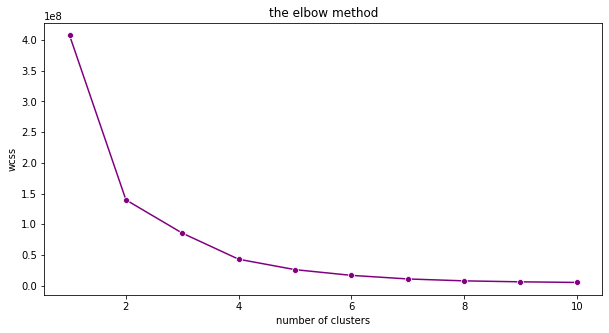

In [35]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
X=[]
for index, planet_mass in enumerate(planet_masses):
  temp_list=[planet_radiuses[index],planet_mass]
  X.append(temp_list)
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
sns.lineplot(range(1,11),wcss,marker="o",color="purple")
plt.title("the elbow method")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()

In [36]:
planet_masses=[]
planet_radiuses=[]
planet_types=[]
for planet_data in low_gravity_planet:
  planet_masses.append(planet_data[3])
  planet_radiuses.append(planet_data[7])
  planet_types.append(planet_data[6])
fig=px.scatter(x=planet_radiuses, y=planet_masses, color=planet_types)
fig.show()

In [37]:
suitable_planet=[]
for planet_data in low_gravity_planet:
  if planet_data[6].lower()=="terrestrial" or planet_data[6].lower()=="super earth":
    suitable_planet.append(planet_data)
print(len(suitable_planet))

1452


In [38]:
print(headers)

['row_none', 'name', 'light_years_from_earth', 'planet_mass', 'stellar_magnitude', 'discovery_date', 'planet_type', 'planet_radius', 'orbital_radius', 'orbital_period', 'eccentricity', 'solar_system_name', 'planet_discovery_method', 'planet_orbital_inclination', 'planet_density', 'right_ascension', 'declination', 'host_temperature', 'host_mass', 'host_radius']


In [39]:
temp_suitable_planet=list(suitable_planet)
for planet_data in temp_suitable_planet:
  if planet_data[8].lower()=="unknown":
    suitable_planet.remove(planet_data)
for planet_data in suitable_planet:
  if planet_data[9].split(" ")[1].lower()=="days":
    planet_data[9]=float(planet_data[9].split(" ")[0])
  else:
    planet_data[9]=float(planet_data[9].split(" ")[0])*365
  planet_data[8]=float(planet_data[8].split(" ")[0])
orbital_radiuses=[]
orbital_periods=[]
for planet_data in suitable_planet:
  orbital_radiuses.append(planet_data[8])
  orbital_periods.append(planet_data[9])
fig=px.scatter(x=orbital_radiuses, y=orbital_periods)
fig.show()

In [44]:
goldilock_planets=list(suitable_planet)
temp_goldilock_planet=list(suitable_planet)
for planet_data in temp_goldilock_planet:
  if planet_data[8]<0.38 or planet_data[8]>2:
    goldilock_planets.remove(planet_data)
print(len(suitable_planet))
print(len(goldilock_planets))

696
25


In [46]:
planet_speed=[]
for planet_data in suitable_planet:
  distance=2*3.14*(planet_data[8]*1.496e+9)
  time=planet_data[9]*86400
  speed=distance/time
  planet_speed.append(speed)
speed_supporting_planets=list(suitable_planet)
temp_speed_supporting_planet=list(suitable_planet)
for index,planet_data in enumerate(temp_speed_supporting_planet):
  if planet_speed[index]>200:
    speed_supporting_planets.remove(planet_data)
print(len(speed_supporting_planets))

8


In [47]:
habitable_planet=[]
for planet in speed_supporting_planets:
  if planet in goldilock_planets:
    habitable_planet.append(planet)
print(len(habitable_planet))

6


In [48]:
final_dict={}
for index_planet_data in enumerate(planet_data_rows):
  feature_list=[]
  gravity=(float(planet_data[3])*5.972e+24)/(float(planet_data[7])*float(planet_data[7])*6371000*6371000)*6.674e-11
  try:
    if gravity<100:
      feature_list.append("gravity")
  except:pass
  try:
    if planet_data[6].lower()=="terestrial" or planet_data[6].lower()=="super earth":
      feature_list.append("planet_types")
  except:pass
  try:
    if planet_data[8]>0.38 or planet_data[8]<2:
      feature_list.append("goldilock")
  except:pass
  try:
    distance=2*3.14*(planet_data[8]*1.496e+9)
    time=planet_data[9]*86400
    speed=distance/time
    if speed<200:
      feature_list.append("speed")
  except:pass
  final_dict[index]=feature_list
print(final_dict)

{695: ['gravity', 'planet_types', 'goldilock']}


In [50]:
goldilock_planets_count=0
for key,value in final_dict.items():
  if "goldilock" in value:
    goldilock_planets_count+=1
print(goldilock_planets_count)

1


In [51]:
speed_planets_count=0
for key,value in final_dict.items():
  if "speed" in value:
    speed_planets_count+=1
print(speed_planets_count)

0
